# Design with explicit Formula

This tutorial notebook shows how to setup a D-optimal design with BoFire while providing an explicit formula and not just one of the four available keywords `linear`, `linear-and-interaction`, `linear-and-quadratic`, `fully-quadratic`.

Make sure that `cyipopt`is installed. The recommend way is the installation via conda `conda install -c conda-forge cyipopt`.

## Imports

In [1]:
from bofire.data_models.api import Domain, Inputs
from bofire.data_models.features.api import ContinuousInput
from bofire.strategies.doe.design import find_local_max_ipopt
from formulaic import Formula
from sklearn.preprocessing import MinMaxScaler
import itertools
import pandas as pd
from bofire.utils.doe import get_confounding_matrix

/opt/homebrew/Caskroom/miniforge/base/envs/bofire/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setup of the problem

In [2]:
input_features=Inputs(
        features=[
            ContinuousInput(key="a", bounds = (0,5)),
            ContinuousInput(key="b", bounds= (40, 800)),
            ContinuousInput(key="c", bounds= (80,180)),
            ContinuousInput(key="d", bounds = (200,800)),
        ]  
    )
domain = Domain(inputs=input_features)

## Defintion of the formula for which the optimal points should be found

In [3]:
model_type = Formula("a + {a**2} + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d")
model_type


1 + a + a**2 + b + c + d + a:b + a:c + a:d + b:c + b:d + c:d

## Find D-optimal Design

In [4]:
design = find_local_max_ipopt(domain=domain, model_type=model_type, n_experiments=17)
design


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



,a,b,c,d
exp0,5.000000e+00,40.000000,180.000002,199.999998
exp1,2.500000e+00,800.000008,79.999999,800.000008
exp2,-9.972222e-09,800.000008,180.000002,199.999998
exp3,5.000000e+00,800.000008,180.000002,800.000008
exp4,-9.975610e-09,40.000000,180.000002,199.999998
exp5,-9.975610e-09,800.000008,180.000002,800.000008
exp6,2.500000e+00,800.000008,180.000002,199.999998
exp7,5.000000e+00,40.000000,79.999999,800.000008
exp8,5.000000e+00,800.000008,79.999999,199.999998
exp9,-9.750000e-09,40.000000,79.999999,199.999998


## Analyze Confounding

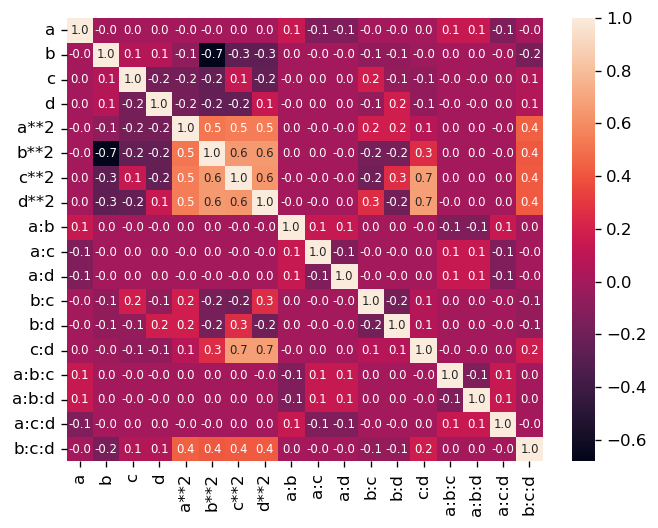

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.dpi"] = 120

m = get_confounding_matrix(domain.inputs, design=design, interactions=[2,3], powers=[2])

# do this when seaborn is installed, which is not the case in the tests
#import seaborn as sns
#sns.heatmap(m, annot=True, annot_kws={"fontsize":7},fmt="2.1f")
#plt.show()
